In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py
import seaborn as sb
df=pd.read_csv('Customer Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#replace blanks with zerosas tenure is 0 and no total charges are recorded

In [2]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# ye bataega ki aapkedata frame mekitni null values h 
df.isnull().sum().sum()


np.int64(0)

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
df["customerID"].duplicated().sum()


np.int64(0)

#converting 0 and 1 to yes or no of senior citixens value to make it more understable

In [14]:
def conv(value):
  if(value==1):
      return "yes"
  else:
      return "no"

df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

In [15]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


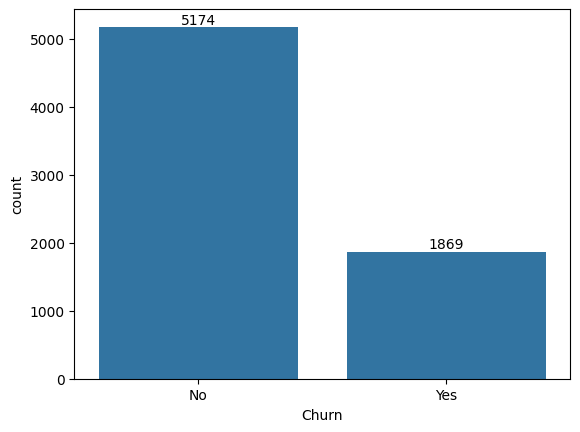

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('Customer Churn.csv')
ax = sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])
plt.show()

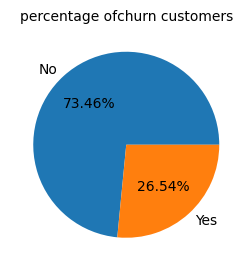

In [9]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%")
plt.title("percentage ofchurn customers",fontsize=10)
plt.show()


#from the given pie chart we can conclude that 26.54% of our customers have churn out 
# now lets find a reason behind it

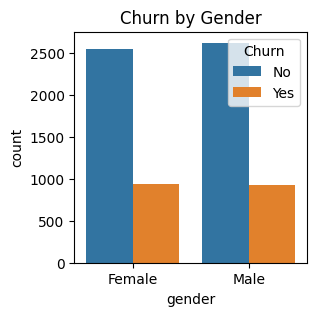

In [18]:
plt.figure(figsize=(3,3))
sns.countplot(x="gender",data=df,hue="Churn")
plt.title("Churn by Gender")
plt.show()

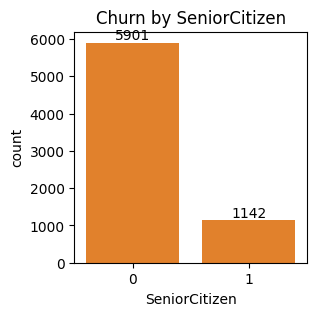

In [29]:
plt.figure(figsize=(3,3))
sns.countplot(x="SeniorCitizen",data=df)
ax = sns.countplot(x="SeniorCitizen", data=df)
ax.bar_label(ax.containers[0])
plt.title("Churn by SeniorCitizen")
plt.show()

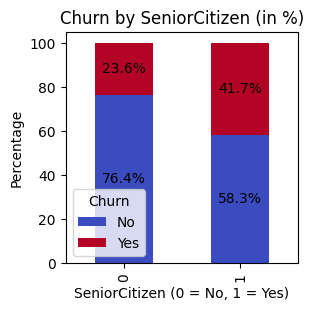

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (adjust path agar file kahin aur ho)
df = pd.read_csv("Customer Churn.csv")

# Group by SeniorCitizen & Churn
grouped = df.groupby(["SeniorCitizen", "Churn"]).size().reset_index(name="count")

# Pivot table for stacked bar chart
pivot_df = grouped.pivot(index="SeniorCitizen", columns="Churn", values="count").fillna(0)

# Convert to percentages
percent_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ax = percent_df.plot(kind="bar", stacked=True, figsize=(3,3), colormap="coolwarm")

# Add % labels inside bars
for c in ax.containers:
    ax.bar_label(c, fmt="%.1f%%", label_type="center")

plt.title("Churn by SeniorCitizen (in %)")
plt.ylabel("Percentage")
plt.xlabel("SeniorCitizen (0 = No, 1 = Yes)")
plt.legend(title="Churn")
plt.show()


#comparitively a greaterpercentage of people in senior citizens have churn out

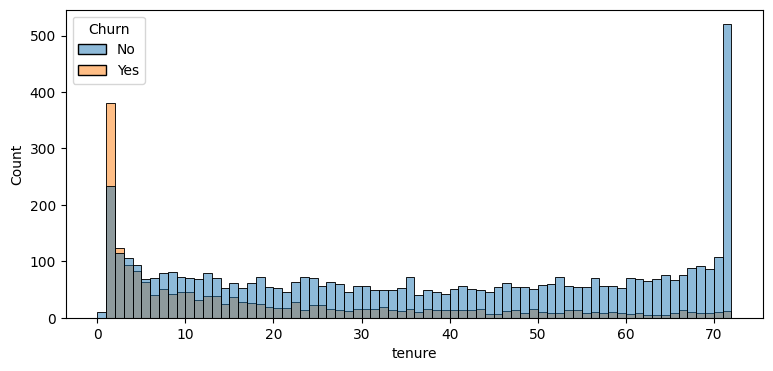

In [6]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=df,hue="Churn",bins=72)
plt.show()

#people who have used our services for a longtime have stayes and people who have used for one or two months have churned

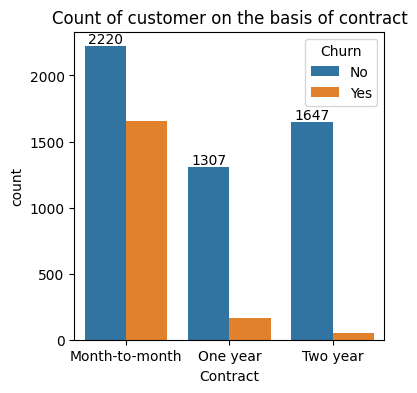

In [11]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of customer on the basis of contract")
plt.show()

#people who have month to month contract are likely to churn then from those whohave 1 or 2 month of contract

In [13]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

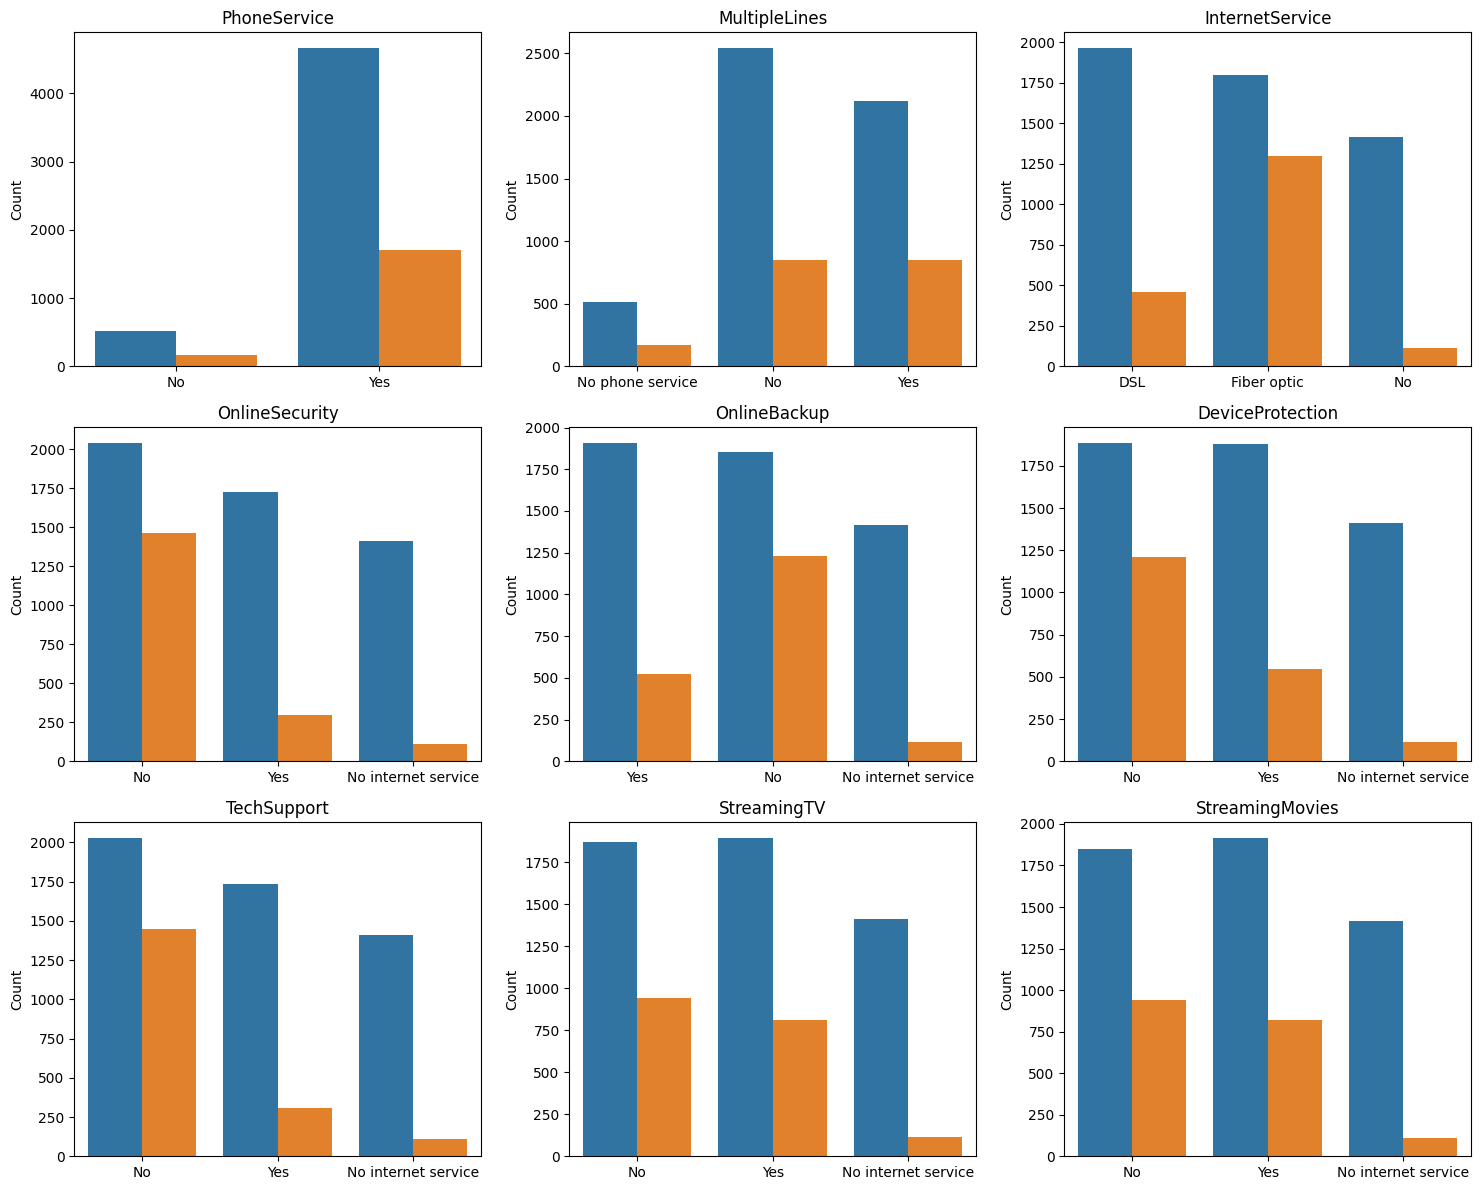

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(x=df[col], hue=df["Churn"], ax=axes[i], legend=False)
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()


#  the majorit of people who do not churn tend to have serivices like phone service,internet service and online security enabled ,online backup ,
# tech support and streaming tv,churnrate are noticiablehigher when the services are notused or  are unavailable.


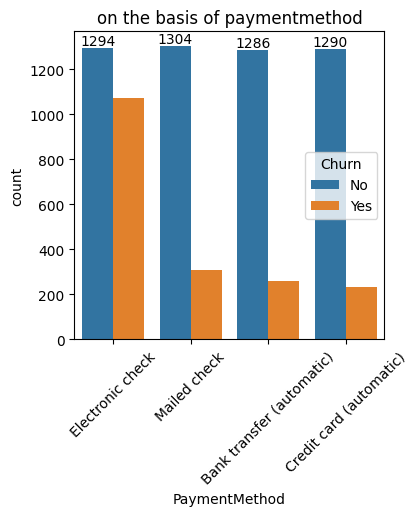

In [30]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.title("on the basis of paymentmethod")
plt.show()

customer is likely to churn when he is using electronic check as  payment mothod

                                          summary of the analysis

Overall Churn Rate

Approximately 26.5% of customers have churned (about 1 in every 4 customers).

This is a significant proportion and indicates potential revenue leakage.

Demographics & Tenure

Senior Citizens show a higher churn rate (almost double) compared to younger customers.

Tenure Effect:

Customers with 1–2 months of tenure churn the most (a large proportion of early users leave).

In contrast, customers who stay longer than 2 years show very low churn (<10%).

Service Usage & Retention

Phone Service and DSL Internet users are more loyal; churn is much lower in these groups (churn below 20%).

Customers with Online Security enabled have a substantially lower churn rate.

Absence of Online Backup, Tech Support, and Streaming Services corresponds with higher churn rates (30–35%), showing these value-added services play a role in retention.

Payment Methods & Churn

Customers using Electronic Check have the highest churn rate (~40%).

Customers using automatic bank transfers or credit cards have churn rates closer to 15–18%, making these safer payment modes from a retention perspective.

✅ Key Strategic Takeaways

Onboarding Focus: Improve the first 2 months of customer experience to reduce the very high early churn.

Targeted Retention for Seniors: Provide dedicated support, simplified plans, or loyalty discounts for senior citizens.

Bundling Services: Encourage adoption of Online Security, Backup, and Tech Support, which are clearly associated with lower churn.

Payment Migration: Actively incentivize customers to move away from Electronic Check to safer payment methods (auto-pay, credit card).